# Business Analytics #

In this report I will be analyzing various KPI's for Yandex.Afisha for the period June 2017 through May 2018. The goal is to determine when visitors become customers, how much revenue does the average customer bring in and whether investments in various ad sources pay off.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns


In [2]:
visits=pd.read_csv('/datasets/visits_log_us.csv')
orders=pd.read_csv('/datasets/orders_log_us.csv')
costs=pd.read_csv('/datasets/costs_us.csv')

## Optimizing the data ##

My first step will be a preliminary look through the data and then I will begin by optimizing the data in order to reduce the file sizes of each of the dataframes. I will reduce the file sizes by converting the different columns in the dataset to the appropriate data type (i.e. category or datetime).

In [3]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [4]:
visits['Device'].unique()

array(['touch', 'desktop'], dtype=object)

In [5]:
visits=pd.read_csv('/datasets/visits_log_us.csv',dtype={'Device':'category','Source Id':'category'},parse_dates=['Start Ts','End Ts'])

In [6]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  category      
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  category      
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
dtypes: category(2), datetime64[ns](2), uint64(1)
memory usage: 8.9 MB


In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [8]:
orders['Buy Ts'] = pd.to_datetime(orders['Buy Ts'])

In [9]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float64       
 2   Uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [10]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [11]:
costs['dt'] = pd.to_datetime(costs['dt'])
costs=pd.read_csv('/datasets/costs_us.csv',dtype={'source_id':'category'},parse_dates=['dt'])

In [12]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   category      
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: category(1), datetime64[ns](1), float64(1)
memory usage: 42.7 KB


I have changed all the columns of the 3 dataframes into appropriate data types such as category or datetime type. This has resulted in a decrease in memory usage for across the dataframes.

# Calculating Metrics #

## Calculating Visiting Metrics ##
I am now ready to begin calculating my firt metrics. Now I will determine the daily, weekly, and monthly active users (DAU, WAU, and MAU). This will be done by grouping the visits dataframe by the start date of each row and aggregating by unique user id.

In [13]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  category      
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  category      
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
dtypes: category(2), datetime64[ns](2), uint64(1)
memory usage: 8.9 MB


In [14]:
visits['daily_visit'] = visits['Start Ts'].dt.date
visits['weekly_visit']= visits['Start Ts'].astype('datetime64[W]')
visits['monthly_visit']= visits['Start Ts'].astype('datetime64[M]')

In [15]:
dau_total =visits.groupby('daily_visit').agg({'Uid':'nunique'}).mean()
weekly_total = visits.groupby('weekly_visit').agg({'Uid':'nunique'}).mean()
monthly_total = visits.groupby('monthly_visit').agg({'Uid':'nunique'}).mean()

In [16]:
print('Our daily active users for this period is:', int(dau_total))
print('Our weekly active users for this period is:', int(weekly_total))
print('Our monthly active users for this period is:', int(monthly_total))

Our daily active users for this period is: 907
Our weekly active users for this period is: 5724
Our monthly active users for this period is: 23228


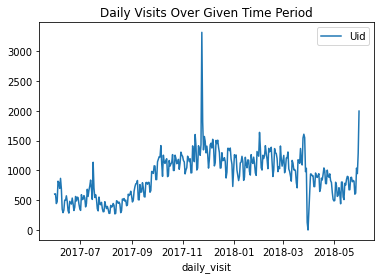

In [17]:
visits.groupby('daily_visit').agg({'Uid':'nunique'}).plot(kind='line')
plt.title('Daily Visits Over Given Time Period')
plt.show()



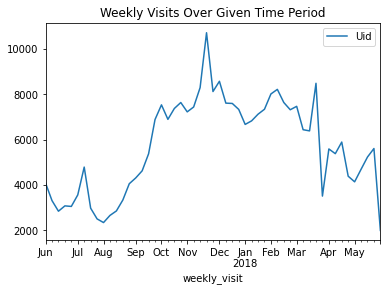

In [18]:
visits.groupby('weekly_visit').agg({'Uid':'nunique'}).plot(kind='line')
plt.title('Weekly Visits Over Given Time Period')
plt.show()


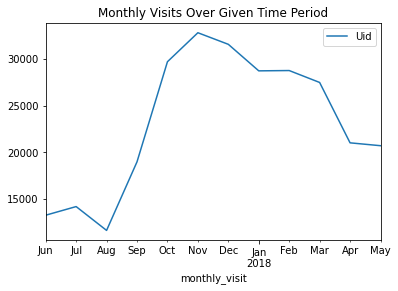

In [19]:
visits.groupby('monthly_visit').agg({'Uid':'nunique'}).plot(kind='line')
plt.title('Monthly Visits Over Given Time Period')
plt.show()


As evidenced by the line graphs above, there was overall growth starting from August. There was also a spike in visits during the holiday season.

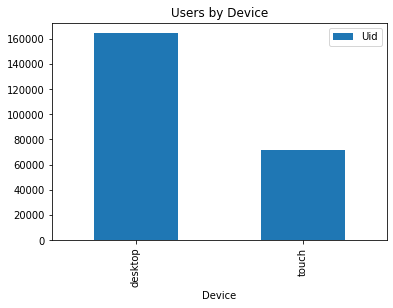

In [20]:
device_count=visits.groupby('Device').agg({'Uid':'nunique'})

device_count.plot(kind='bar')
plt.title('Users by Device')
plt.show()

By grouping the visits dataframe by device and comparing the unique users, I have found there are more users that aaccess the service by using a desktop device than a touch screen.

My next metric of interest is calculating how many sessions have occurred during this period.

In [21]:
visits['Start Ts'].count()

359400

In [22]:
sessions_per_user = visits.groupby('daily_visit').agg({'Uid':['count','nunique']})
sessions_per_user.columns=['n_sessions','n_users']
sessions_per_user['sessions_per_user_daily']= sessions_per_user['n_sessions']/sessions_per_user['n_users']
sessions_per_user


,n_sessions,n_users,sessions_per_user_daily
daily_visit,,,
2017-06-01,664,605,1.097521
2017-06-02,658,608,1.082237
2017-06-03,477,445,1.071910
2017-06-04,510,476,1.071429
2017-06-05,893,820,1.089024
...,...,...,...
2018-05-27,672,620,1.083871
2018-05-28,1156,1039,1.112608
2018-05-29,1035,948,1.091772


In [23]:
sessions_per_user['sessions_per_user_daily'].mean()

1.082169644003972

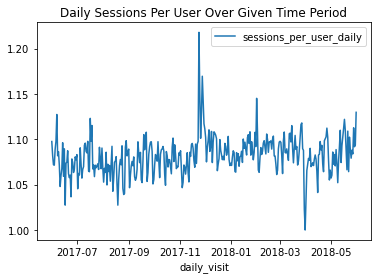

In [24]:
sessions_per_user.groupby('daily_visit').agg({'sessions_per_user_daily':'mean'}).plot()
plt.title('Daily Sessions Per User Over Given Time Period')
plt.show()

By counting the total of visits in the dataframe and dividing the number of sessions by the number of users I have that the overall number of sessions is 359,400 with an average of 1.08 sessions per user during this period of time. 

Now I will calculate the average session length during the time period. 

In [25]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Device         359400 non-null  category      
 1   End Ts         359400 non-null  datetime64[ns]
 2   Source Id      359400 non-null  category      
 3   Start Ts       359400 non-null  datetime64[ns]
 4   Uid            359400 non-null  uint64        
 5   daily_visit    359400 non-null  object        
 6   weekly_visit   359400 non-null  datetime64[ns]
 7   monthly_visit  359400 non-null  datetime64[ns]
dtypes: category(2), datetime64[ns](4), object(1), uint64(1)
memory usage: 17.1+ MB


In [26]:
visits['visit_duration_mins'] = ((visits['End Ts'] - visits['Start Ts']).dt.seconds)/60
avg_length = visits['visit_duration_mins'].mean()
print(avg_length)

10.725108143201632


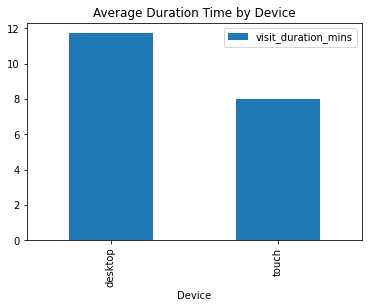

In [27]:
device_length= visits.groupby('Device').agg({'visit_duration_mins':'mean'})
device_length.plot(kind='bar')
plt.title('Average Duration Time by Device')
plt.show()

In [28]:
visits['visit_duration_mins'].describe()

count    359400.000000
mean         10.725108
std          16.938913
min           0.000000
25%           2.000000
50%           5.000000
75%          14.000000
max        1408.000000
Name: visit_duration_mins, dtype: float64

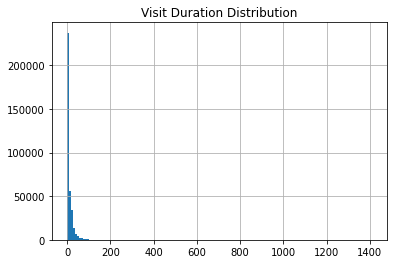

In [29]:
vist_dist= visits['visit_duration_mins'].hist(bins=150)
plt.title('Visit Duration Distribution')
plt.show()

By subtracting the end of the session by the start of the session and dividing it by 60, I determined that the average session lasts almost 11 minutes but as the data is skewed to the right looking at the median or mode will serve our purposes better. The median duration time is 5 minutes. Sessions on desktops last longer on average than those performed on a touch screen device.

Next I will calculate the retention rate, or how many users from a cohort remained active compared to their initial usage of the product. For this metric I will group the users by the month of their first initial visit.

In [31]:
visits.head()

,Device,End Ts,Source Id,Start Ts,Uid,daily_visit,weekly_visit,monthly_visit,visit_duration_mins
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017-12-14,2017-12-01,18.0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018-02-15,2018-02-01,28.0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-06-29,2017-07-01,0.0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,2018-05-17,2018-05-01,24.0
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,2017-12-21,2017-12-01,0.0


In [32]:
first_sessions = visits.groupby('Uid').agg({'Start Ts':'min'}).reset_index()
first_sessions.columns=['Uid','first_session_start']
first_sessions.head()

,Uid,first_session_start
0,11863502262781,2018-03-01 17:27:00
1,49537067089222,2018-02-06 15:55:00
2,297729379853735,2017-06-07 18:47:00
3,313578113262317,2017-09-18 22:49:00
4,325320750514679,2017-09-30 14:29:00


In [33]:
first_sessions['date_start']= first_sessions['first_session_start'].dt.date
first_sessions['week_start']= first_sessions['first_session_start'].astype('datetime64[W]')
first_sessions['month_start']= first_sessions['first_session_start'].astype('datetime64[M]')
first_sessions.sort_values(by='date_start').head()


,Uid,first_session_start,date_start,week_start,month_start
225380,18222570261901395416,2017-06-01 14:34:00,2017-06-01,2017-06-01,2017-06-01
120405,9737640335185488211,2017-06-01 20:31:00,2017-06-01,2017-06-01,2017-06-01
101247,8171509829973554245,2017-06-01 09:17:00,2017-06-01,2017-06-01,2017-06-01
137055,11062788618907079633,2017-06-01 10:43:00,2017-06-01,2017-06-01,2017-06-01
197507,15966218496410004189,2017-06-01 20:10:00,2017-06-01,2017-06-01,2017-06-01


In [34]:
visits= pd.merge(visits,first_sessions, on='Uid')
visits.head()

,Device,End Ts,Source Id,Start Ts,Uid,daily_visit,weekly_visit,monthly_visit,visit_duration_mins,first_session_start,date_start,week_start,month_start
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017-12-14,2017-12-01,18.0,2017-12-20 17:20:00,2017-12-20,2017-12-14,2017-12-01
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018-02-15,2018-02-01,28.0,2018-02-19 16:53:00,2018-02-19,2018-02-15,2018-02-01
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-06-29,2017-07-01,0.0,2017-07-01 01:54:00,2017-07-01,2017-06-29,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,2018-05-17,2018-05-01,24.0,2018-03-09 20:05:00,2018-03-09,2018-03-08,2018-03-01
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018-03-09,2018-03-08,2018-03-01,28.0,2018-03-09 20:05:00,2018-03-09,2018-03-08,2018-03-01


I will now calculate the lifetime or age of each cohort's visits by subtracting the month of their visit from the month of their first visit.

In [35]:
visits['cohort_lifetime']= (visits['monthly_visit']- visits['month_start'])/np.timedelta64(1,'M')
visits['cohort_lifetime']= visits['cohort_lifetime'].round()
visits['cohort_lifetime']= visits['cohort_lifetime'].astype('int')
visits.head()


,Device,End Ts,Source Id,Start Ts,Uid,daily_visit,weekly_visit,monthly_visit,visit_duration_mins,first_session_start,date_start,week_start,month_start,cohort_lifetime
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017-12-14,2017-12-01,18.0,2017-12-20 17:20:00,2017-12-20,2017-12-14,2017-12-01,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018-02-15,2018-02-01,28.0,2018-02-19 16:53:00,2018-02-19,2018-02-15,2018-02-01,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-06-29,2017-07-01,0.0,2017-07-01 01:54:00,2017-07-01,2017-06-29,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,2018-05-17,2018-05-01,24.0,2018-03-09 20:05:00,2018-03-09,2018-03-08,2018-03-01,2
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018-03-09,2018-03-08,2018-03-01,28.0,2018-03-09 20:05:00,2018-03-09,2018-03-08,2018-03-01,0


In [36]:
cohorts= visits.groupby(['month_start','cohort_lifetime']).agg({'Uid':'nunique'}).reset_index()
cohorts

,month_start,cohort_lifetime,Uid
0,2017-06-01,0,13259
1,2017-06-01,1,1043
2,2017-06-01,2,713
3,2017-06-01,3,814
4,2017-06-01,4,909
...,...,...,...
73,2018-03-01,1,861
74,2018-03-01,2,557
75,2018-04-01,0,15709
76,2018-04-01,1,760


In [37]:
initial_users=cohorts[cohorts['cohort_lifetime']==0][['Uid','month_start']]
initial_users= initial_users.rename(columns={'Uid':'cohort_count'})
initial_users.head()

,cohort_count,month_start
0,13259,2017-06-01
12,13140,2017-07-01
23,10181,2017-08-01
33,16704,2017-09-01
42,25977,2017-10-01


In [38]:
cohorts= pd.merge(cohorts,initial_users, on='month_start')
cohorts.head()

,month_start,cohort_lifetime,Uid,cohort_count
0,2017-06-01,0,13259,13259
1,2017-06-01,1,1043,13259
2,2017-06-01,2,713,13259
3,2017-06-01,3,814,13259
4,2017-06-01,4,909,13259


In [39]:
cohorts['retention_rate']=cohorts['Uid']/cohorts['cohort_count']
cohorts= cohorts.fillna('')

In [40]:
retention_piv = cohorts.pivot_table(index='month_start',columns='cohort_lifetime',values='retention_rate', aggfunc='sum')
retention_piv

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
month_start,,,,,,,,,,,,
2017-06-01,1.0,0.078664,0.053775,0.061392,0.068557,0.071423,0.061015,0.057772,0.052342,0.050833,0.040652,0.044951
2017-07-01,1.0,0.056088,0.051294,0.056164,0.058219,0.048174,0.045358,0.045738,0.038813,0.028615,0.027473,NaN
2017-08-01,1.0,0.076908,0.062862,0.062764,0.050093,0.044004,0.036342,0.039485,0.027895,0.026029,NaN,NaN
2017-09-01,1.0,0.085489,0.069205,0.050706,0.039392,0.037835,0.035860,0.024186,0.022809,NaN,NaN,NaN
2017-10-01,1.0,0.078608,0.052239,0.038958,0.034261,0.032221,0.021365,0.020364,NaN,NaN,NaN,NaN
2017-11-01,1.0,0.078281,0.044113,0.038682,0.033727,0.023415,0.021800,NaN,NaN,NaN,NaN,NaN
2017-12-01,1.0,0.055802,0.037993,0.031107,0.020263,0.019036,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,1.0,0.059715,0.039339,0.024973,0.020244,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,1.0,0.057080,0.025454,0.020093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


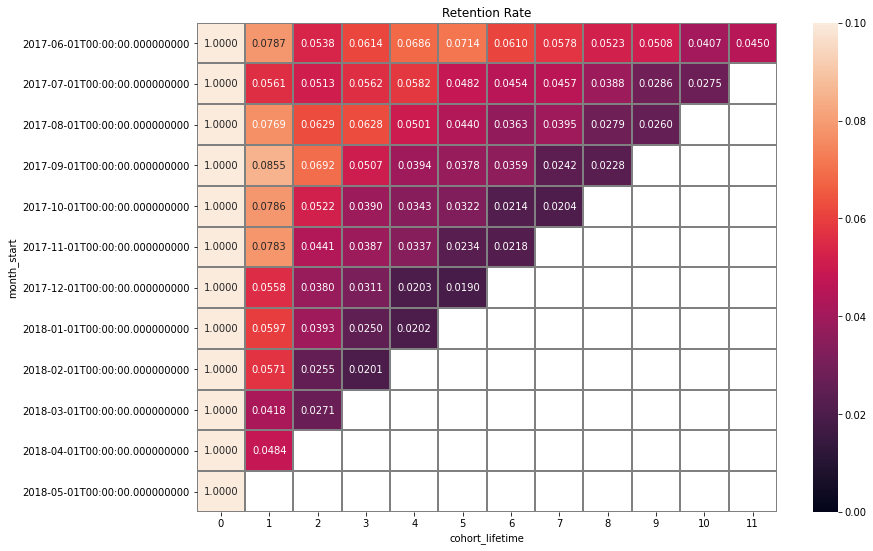

In [41]:
plt.figure(figsize=(13, 9))
plt.title('Retention Rate')
sns.heatmap(
    retention_piv,
    vmin=0,
    vmax=0.1,
    annot=True,
    fmt='.4f',
    linewidths=1,
    linecolor='gray',
)
plt.show()

In [42]:
retention_piv[1].mean()

0.06516659710392834

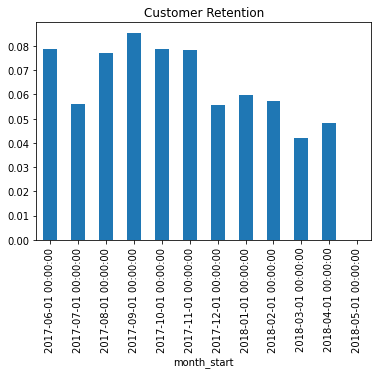

In [43]:
retention_piv[1].plot(kind='bar')
plt.title('Customer Retention')
plt.show()

After grouping the users into cohorts based on their initial visit and calculating the cohort's age I found that on average after their first visit, about 6% of the users come back again next month. For every cohort there is a great drop in retention rate in the following first month. 

## Calculating Sales Metrics ##

I will now move onto sales metrics. My next metric to analyze is customer conversion and determining how long after their first visit do customer's typically make a purchase. I will start by finding the earliest session times in order to form cohorts.

In [44]:
orders.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [45]:
first_orders = orders.groupby('Uid').agg({'Buy Ts':'min'}).reset_index()
first_orders

,Uid,Buy Ts
0,313578113262317,2018-01-03 21:51:00
1,1575281904278712,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 18:33:00
3,2464366381792757,2018-01-28 15:54:00
4,2551852515556206,2017-11-24 10:14:00
...,...,...
36518,18445147675727495770,2017-11-24 09:03:00
36519,18445407535914413204,2017-09-22 23:55:00
36520,18445601152732270159,2018-03-26 22:54:00
36521,18446156210226471712,2018-02-18 19:34:00


In [46]:
first_orders['date_order']= first_orders['Buy Ts'].dt.date
first_orders['week_order']= first_orders['Buy Ts'].astype('datetime64[W]')
first_orders['month_order']= first_orders['Buy Ts'].astype('datetime64[M]')
first_orders.head()

,Uid,Buy Ts,date_order,week_order,month_order
0,313578113262317,2018-01-03 21:51:00,2018-01-03,2017-12-28,2018-01-01
1,1575281904278712,2017-06-03 10:13:00,2017-06-03,2017-06-01,2017-06-01
2,2429014661409475,2017-10-11 18:33:00,2017-10-11,2017-10-05,2017-10-01
3,2464366381792757,2018-01-28 15:54:00,2018-01-28,2018-01-25,2018-01-01
4,2551852515556206,2017-11-24 10:14:00,2017-11-24,2017-11-23,2017-11-01


In [47]:
first_order_visit= pd.merge(first_sessions,first_orders,on='Uid')
first_order_visit.head()

,Uid,first_session_start,date_start,week_start,month_start,Buy Ts,date_order,week_order,month_order
0,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09-14,2017-09-01,2018-01-03 21:51:00,2018-01-03,2017-12-28,2018-01-01
1,1575281904278712,2017-06-03 10:13:00,2017-06-03,2017-06-01,2017-06-01,2017-06-03 10:13:00,2017-06-03,2017-06-01,2017-06-01
2,2429014661409475,2017-10-11 17:14:00,2017-10-11,2017-10-05,2017-10-01,2017-10-11 18:33:00,2017-10-11,2017-10-05,2017-10-01
3,2464366381792757,2018-01-27 20:10:00,2018-01-27,2018-01-25,2018-01-01,2018-01-28 15:54:00,2018-01-28,2018-01-25,2018-01-01
4,2551852515556206,2017-11-24 10:14:00,2017-11-24,2017-11-23,2017-11-01,2017-11-24 10:14:00,2017-11-24,2017-11-23,2017-11-01


I will now create a new column that will find the difference between the day a customer first visited the site and the day they made their first order.

In [48]:
first_order_visit['date_start']= pd.to_datetime(first_order_visit['date_start'])
first_order_visit['date_order']= pd.to_datetime(first_order_visit['date_order'])

first_order_visit['days_to_first_buy']= ((first_order_visit['date_order'] - first_order_visit['date_start'])/np.timedelta64(1,'D')).astype('int')



In [49]:
first_order_visit.head()

,Uid,first_session_start,date_start,week_start,month_start,Buy Ts,date_order,week_order,month_order,days_to_first_buy
0,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09-14,2017-09-01,2018-01-03 21:51:00,2018-01-03,2017-12-28,2018-01-01,107
1,1575281904278712,2017-06-03 10:13:00,2017-06-03,2017-06-01,2017-06-01,2017-06-03 10:13:00,2017-06-03,2017-06-01,2017-06-01,0
2,2429014661409475,2017-10-11 17:14:00,2017-10-11,2017-10-05,2017-10-01,2017-10-11 18:33:00,2017-10-11,2017-10-05,2017-10-01,0
3,2464366381792757,2018-01-27 20:10:00,2018-01-27,2018-01-25,2018-01-01,2018-01-28 15:54:00,2018-01-28,2018-01-25,2018-01-01,1
4,2551852515556206,2017-11-24 10:14:00,2017-11-24,2017-11-23,2017-11-01,2017-11-24 10:14:00,2017-11-24,2017-11-23,2017-11-01,0


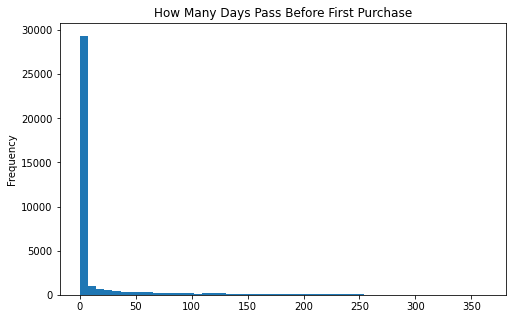

In [50]:
first_order_visit['days_to_first_buy'].plot(kind='hist',bins=50, figsize=(8,5))
plt.title('How Many Days Pass Before First Purchase')
plt.show()

In [51]:
print(first_order_visit['days_to_first_buy'].describe())
first_order_visit['days_to_first_buy'].mode()


count    36523.000000
mean        16.895901
std         47.071200
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max        363.000000
Name: days_to_first_buy, dtype: float64


0    0
dtype: int64

As seen by the histogram graph above, the vast majority of customers placed their first order on the same day as their first visit. There are extreme cases such as a customer that waited almost a year to place their first order. As the data is very skewed it is best to look at the median in this case which is 0 days. The mode is also 0 days. 

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

You are absolutely right
</div>

I will now investigate how many orders are made in the given time period and what is the average number of orders per customer. I will do this by forming cohorts based on the month date that the orders were made and aggregating the number of orders.

In [52]:
orders.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [53]:
orders['Revenue'].describe()

count    50415.000000
mean         4.999647
std         21.818359
min          0.000000
25%          1.220000
50%          2.500000
75%          4.890000
max       2633.280000
Name: Revenue, dtype: float64

In [54]:
orders['month_order']=orders['Buy Ts'].astype('datetime64[M]')
orders.head()

,Buy Ts,Revenue,Uid,month_order
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01


In [55]:
first_order_month= orders.groupby('Uid').agg({'month_order':'min'}).reset_index()
first_order_month.rename(columns={'month_order':'first_month_order'},inplace=True)

agg_orders= pd.merge(orders,first_order_month,on='Uid')
agg_orders

,Buy Ts,Revenue,Uid,month_order,first_month_order
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01
...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-01,2018-05-01
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-01,2018-05-01
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-01,2018-05-01
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-01,2018-05-01


In [56]:
cohort_sizes= agg_orders.groupby('first_month_order').agg({'Uid':'nunique'}).reset_index()
cohort_sizes.rename(columns={'Uid':'nuniq_users'},inplace=True)
cohort_sizes

,first_month_order,nuniq_users
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340
5,2017-11-01,4081
6,2017-12-01,4383
7,2018-01-01,3373
8,2018-02-01,3651
9,2018-03-01,3533


In [57]:
agg_orders= agg_orders.groupby(['first_month_order','month_order']).agg({'Revenue':['count','sum']}).reset_index()
agg_orders.columns=['first_month_order','month_order','orders_n','revenue']


In [58]:
agg_orders=pd.merge(agg_orders,cohort_sizes,on='first_month_order')
agg_orders

,first_month_order,month_order,orders_n,revenue,nuniq_users
0,2017-06-01,2017-06-01,2354,9557.49,2023
1,2017-06-01,2017-07-01,177,981.82,2023
2,2017-06-01,2017-08-01,174,885.34,2023
3,2017-06-01,2017-09-01,226,1931.30,2023
4,2017-06-01,2017-10-01,292,2068.58,2023
...,...,...,...,...,...
74,2018-03-01,2018-05-01,176,1114.87,3533
75,2018-04-01,2018-04-01,2495,10600.69,2276
76,2018-04-01,2018-05-01,195,1209.92,2276
77,2018-05-01,2018-05-01,3249,13925.76,2988


Now that I have properly aggregated my orders dataframe, I will find the orders per user by dividing the number of orders made by the number of unique users in the cohort.

In [59]:
agg_orders['order_per_user']=agg_orders['orders_n']/agg_orders['nuniq_users']

agg_orders['age']=(agg_orders['month_order']-agg_orders['first_month_order'])/np.timedelta64(1,'M')
agg_orders['age']=agg_orders['age'].round().astype('int')

agg_orders

,first_month_order,month_order,orders_n,revenue,nuniq_users,order_per_user,age
0,2017-06-01,2017-06-01,2354,9557.49,2023,1.163618,0
1,2017-06-01,2017-07-01,177,981.82,2023,0.087494,1
2,2017-06-01,2017-08-01,174,885.34,2023,0.086011,2
3,2017-06-01,2017-09-01,226,1931.30,2023,0.111715,3
4,2017-06-01,2017-10-01,292,2068.58,2023,0.144340,4
...,...,...,...,...,...,...,...
74,2018-03-01,2018-05-01,176,1114.87,3533,0.049816,2
75,2018-04-01,2018-04-01,2495,10600.69,2276,1.096221,0
76,2018-04-01,2018-05-01,195,1209.92,2276,0.085677,1
77,2018-05-01,2018-05-01,3249,13925.76,2988,1.087349,0


In [60]:
avg_order_per_user= agg_orders.pivot_table(
    index='first_month_order',
    columns='age',
    values='order_per_user',
    aggfunc='mean'
).cumsum(axis=1)

avg_order_per_user

age,0,1,2,3,4,5,6,7,8,9,10,11
first_month_order,,,,,,,,,,,,
2017-06-01,1.163618,1.251112,1.337123,1.448838,1.593178,1.700939,1.837370,1.923381,2.028176,2.103806,2.151261,2.193772
2017-07-01,1.136765,1.188768,1.251170,1.305252,1.342694,1.385335,1.417057,1.443058,1.473219,1.485699,1.513261,NaN
2017-08-01,1.118978,1.197810,1.270803,1.329927,1.391971,1.437226,1.472993,1.529927,1.563504,1.597080,NaN,NaN
2017-09-01,1.136381,1.221232,1.283611,1.347152,1.373111,1.415343,1.457187,1.478884,1.502518,NaN,NaN,NaN
2017-10-01,1.143779,1.216129,1.253456,1.281567,1.311290,1.335023,1.354839,1.383641,NaN,NaN,NaN,NaN
2017-11-01,1.179368,1.276648,1.321245,1.372948,1.406273,1.420730,1.445724,NaN,NaN,NaN,NaN,NaN
2017-12-01,1.152635,1.214237,1.260324,1.301164,1.320785,1.344741,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,1.121554,1.187963,1.235102,1.254076,1.277201,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,1.121611,1.182416,1.205149,1.224322,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


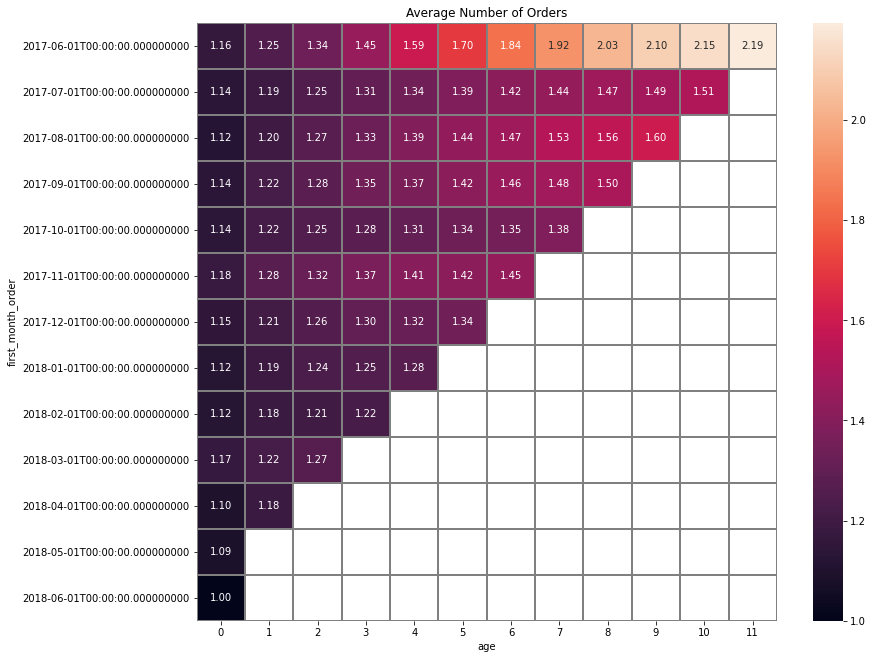

In [61]:
plt.figure(figsize=(13,11))
plt.title('Average Number of Orders')
sns.heatmap(
    avg_order_per_user,
    annot=True,
    fmt='.2f',
    linewidths=1,
    linecolor='gray'
)
plt.show()

In this time period there were 50,415 orders. The heatmap above shows the cumulative average number of orders that were made per customer in each cohort. For example in the first cohort, after about a year, the average number of orders per customer was 2.19.

With the order cohort I made above I can also find the average revenue brought in by users during this period of time. I will do this by dividing the revenue column by the number of unique users in the cohort.

In [62]:
agg_orders['rev_per_user']=agg_orders['revenue']/agg_orders['nuniq_users']
agg_orders

,first_month_order,month_order,orders_n,revenue,nuniq_users,order_per_user,age,rev_per_user
0,2017-06-01,2017-06-01,2354,9557.49,2023,1.163618,0,4.724414
1,2017-06-01,2017-07-01,177,981.82,2023,0.087494,1,0.485329
2,2017-06-01,2017-08-01,174,885.34,2023,0.086011,2,0.437637
3,2017-06-01,2017-09-01,226,1931.30,2023,0.111715,3,0.954671
4,2017-06-01,2017-10-01,292,2068.58,2023,0.144340,4,1.022531
...,...,...,...,...,...,...,...,...
74,2018-03-01,2018-05-01,176,1114.87,3533,0.049816,2,0.315559
75,2018-04-01,2018-04-01,2495,10600.69,2276,1.096221,0,4.657597
76,2018-04-01,2018-05-01,195,1209.92,2276,0.085677,1,0.531599
77,2018-05-01,2018-05-01,3249,13925.76,2988,1.087349,0,4.660562


In [63]:
avg_rev_per_user= agg_orders.pivot_table(
    index='first_month_order',
    columns='age',
    values='rev_per_user',
    aggfunc='mean'

).cumsum(axis=1)

avg_rev_per_user

age,0,1,2,3,4,5,6,7,8,9,10,11
first_month_order,,,,,,,,,,,,
2017-06-01,4.724414,5.209743,5.647380,6.602051,7.624582,8.360084,9.310524,9.892116,10.445329,11.051117,11.622378,11.879234
2017-07-01,6.010218,6.345429,6.968960,7.327936,7.504727,7.660775,7.780983,7.922803,8.084035,8.231180,8.386854,NaN
2017-08-01,5.276518,5.748511,6.206993,6.598270,7.092321,7.375861,7.586526,7.991533,8.283745,8.471723,NaN,NaN
2017-09-01,5.644529,6.762115,7.283045,11.258838,11.659396,12.306463,13.008071,13.251220,13.435227,NaN,NaN,NaN
2017-10-01,5.003733,5.539495,5.730889,5.888035,6.039594,6.159956,6.244772,6.360242,NaN,NaN,NaN,NaN
2017-11-01,5.154683,5.553916,5.753472,6.078424,6.226437,6.280316,6.395244,NaN,NaN,NaN,NaN,NaN
2017-12-01,4.738191,4.998565,5.923662,6.988937,7.301866,7.639913,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,4.135636,4.430394,4.734675,4.877453,4.940151,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,4.156987,4.435262,4.513777,4.587921,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


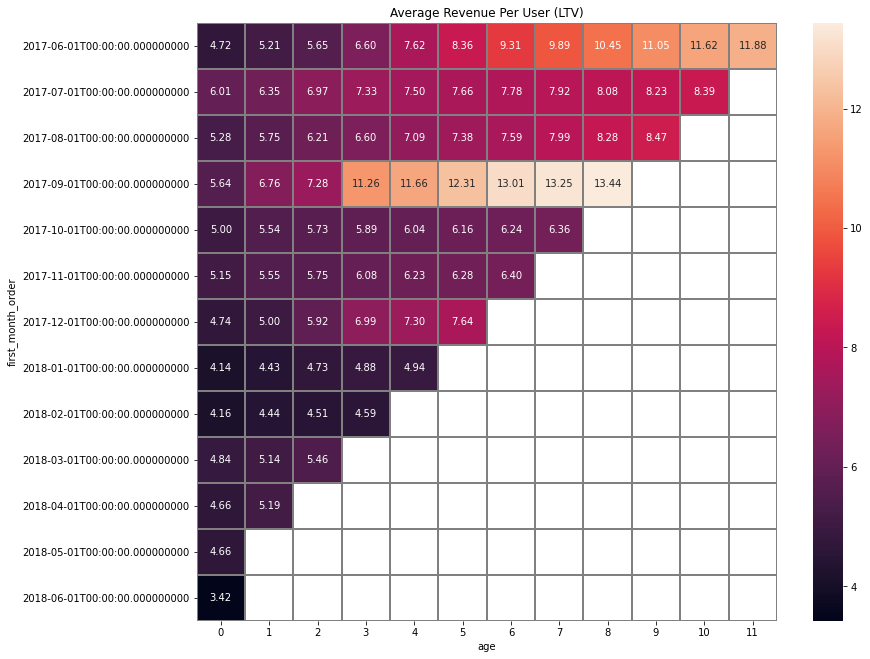

In [64]:
plt.figure(figsize=(13,11))
plt.title('Average Revenue Per User (LTV)')
sns.heatmap(
  avg_rev_per_user,
    annot=True,
    fmt='.2f',
    linewidths=1,
    linecolor='gray'
)
plt.show()

The above heatmap shows that cumulative average revenue per customer or their lifetime value (LTV). For example cohort 1, after about a year has an average revenue of 11.88 per user.

## Calculating Marketing Metrics ##

Finally, it is time to consider the marketing metrics.
The first thing to consider is how much money was spent overall for marketing in this given time period.

In [71]:
costs['source_id'].value_counts()

5     364
1     363
10    363
2     363
3     363
4     363
9     363
Name: source_id, dtype: int64

In [72]:
costs['costs'].sum()

329131.62

Overall,the amount of money spent on marketing during this period was 329,131.62.

Next, to determine which source was worth the investment, I must first calculate how much of the marketing budget was spent on each source.

In [73]:
source_costs= costs.groupby('source_id').agg({'costs':'sum'})
source_costs.sort_values(by='costs')

,costs
source_id,
9,5517.49
10,5822.49
1,20833.27
2,42806.04
5,51757.10
4,61073.60
3,141321.63


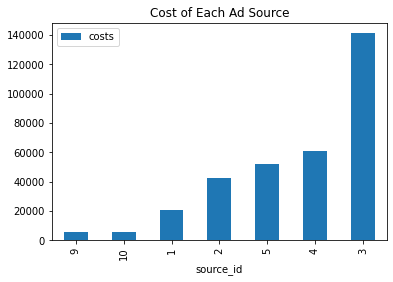

In [74]:
source_costs.sort_values(by='costs').plot(kind='bar')
plt.title('Cost of Each Ad Source')
plt.show()

Per source, the most money was spent on source 3 (141,321.63) and the least was spent on source 9 (5,517.49).

Seasonality is also something to keep in mind-- I will now see how marketing spending changed over the period of time.

In [75]:
costs['date_cost']= costs['dt'].dt.date
costs['week_cost']= costs['dt'].astype('datetime64[W]')
costs['month_cost']= costs['dt'].astype('datetime64[M]')

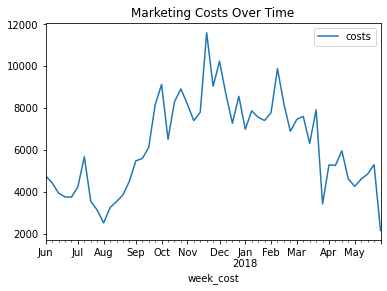

In [76]:
costs.groupby('week_cost').agg({'costs':'sum'}).plot(kind='line')
plt.title('Marketing Costs Over Time')
plt.show()

In [77]:
costs.groupby('week_cost').agg({'costs':'sum'}).describe()

,costs
count,53.000000
mean,6210.030566
std,2196.813174
min,2153.700000
25%,4427.520000
50%,6113.440000
75%,7862.760000
max,11590.380000


There was a spike in costs around late November, early December. The maximum was 11,590 with the min being 2,153. The average cost was about 6,210. It seems the highest cost in marketing was done around the holiday season, probably to target those shopping for the holidays.

Now I will calculate the overall cost of customer acquisition cost (CAC) of each of the sources by taking the costs of the source and dividing it by the unique number of users that came from it.

In [78]:
source= visits.groupby('Source Id').agg({'Uid':'nunique'}).reset_index()
source

,Source Id,Uid
0,1,18999
1,10,8067
2,2,26245
3,3,74756
4,4,83525
5,5,56974
6,6,6
7,7,34
8,9,9264


In [79]:
source_costs=source_costs.reset_index()

In [80]:
source = pd.merge(source,source_costs,left_on='Source Id', right_on='source_id')
source

,Source Id,Uid,source_id,costs
0,1,18999,1,20833.27
1,10,8067,10,5822.49
2,2,26245,2,42806.04
3,3,74756,3,141321.63
4,4,83525,4,61073.60
5,5,56974,5,51757.10
6,9,9264,9,5517.49


In [81]:
source=source[['Source Id','Uid','costs']]
source=source.rename(columns={'Uid':'n_buyers'})
source

,Source Id,n_buyers,costs
0,1,18999,20833.27
1,10,8067,5822.49
2,2,26245,42806.04
3,3,74756,141321.63
4,4,83525,61073.60
5,5,56974,51757.10
6,9,9264,5517.49


In [82]:
source['cac']=source['costs']/source['n_buyers']
source

,Source Id,n_buyers,costs,cac
0,1,18999,20833.27,1.096546
1,10,8067,5822.49,0.721766
2,2,26245,42806.04,1.631017
3,3,74756,141321.63,1.890439
4,4,83525,61073.60,0.731201
5,5,56974,51757.10,0.908434
6,9,9264,5517.49,0.595584


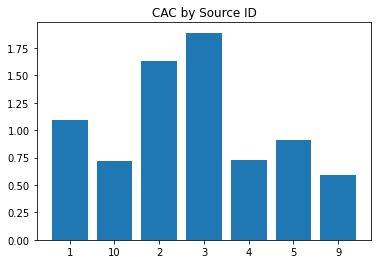

In [83]:
x= source['Source Id']
y= source['cac']
plt.bar(x,y)
plt.title('CAC by Source ID')
plt.show()

Above is the CAC from each source. Source 3 had the highest CAC at about 1.890 with source 9 having the lowest at about 0.5956

Finally, figuring out the ROI of a source is imperative to ensure that funds are not wasted in the future on a source that did not perform well. The ROI will be calculated by dividing the LTV by the CAC of each source.

Let's break down our data by source. I will find the number of unique users per source and also form the cohorts based on the first month costs of each source.

In [84]:
visits.head()

,Device,End Ts,Source Id,Start Ts,Uid,daily_visit,weekly_visit,monthly_visit,visit_duration_mins,first_session_start,date_start,week_start,month_start,cohort_lifetime
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017-12-14,2017-12-01,18.0,2017-12-20 17:20:00,2017-12-20,2017-12-14,2017-12-01,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018-02-15,2018-02-01,28.0,2018-02-19 16:53:00,2018-02-19,2018-02-15,2018-02-01,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-06-29,2017-07-01,0.0,2017-07-01 01:54:00,2017-07-01,2017-06-29,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,2018-05-17,2018-05-01,24.0,2018-03-09 20:05:00,2018-03-09,2018-03-08,2018-03-01,2
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018-03-09,2018-03-08,2018-03-01,28.0,2018-03-09 20:05:00,2018-03-09,2018-03-08,2018-03-01,0


In [85]:
n_buyer_cohort= visits.groupby(['month_start','Source Id']).agg({'Uid':'nunique'}).reset_index()
n_buyer_cohort.rename(columns={'Source Id':'source_id'},inplace=True)

In [86]:
n_buyer_cohort.head()

,month_start,source_id,Uid
0,2017-06-01,1,1513
1,2017-06-01,10,543
2,2017-06-01,2,2202
3,2017-06-01,3,5199
4,2017-06-01,4,4602


In [87]:
costs.head()

,source_id,dt,costs,date_cost,week_cost,month_cost
0,1,2017-06-01,75.20,2017-06-01,2017-06-01,2017-06-01
1,1,2017-06-02,62.25,2017-06-02,2017-06-01,2017-06-01
2,1,2017-06-03,36.53,2017-06-03,2017-06-01,2017-06-01
3,1,2017-06-04,55.00,2017-06-04,2017-06-01,2017-06-01
4,1,2017-06-05,57.08,2017-06-05,2017-06-01,2017-06-01


In [88]:
first_cost_month=costs.groupby('source_id').agg({'dt':'min'}).reset_index()
first_cost_month.rename(columns={'dt':'first_cost_month'},inplace=True)
first_cost_month

,source_id,first_cost_month
0,1,2017-06-01
1,10,2017-06-01
2,2,2017-06-01
3,3,2017-06-01
4,4,2017-06-01
5,5,2017-06-01
6,9,2017-06-01


In [89]:
costs1=pd.merge(costs,first_cost_month,on='source_id')
costs1.head()

,source_id,dt,costs,date_cost,week_cost,month_cost,first_cost_month
0,1,2017-06-01,75.20,2017-06-01,2017-06-01,2017-06-01,2017-06-01
1,1,2017-06-02,62.25,2017-06-02,2017-06-01,2017-06-01,2017-06-01
2,1,2017-06-03,36.53,2017-06-03,2017-06-01,2017-06-01,2017-06-01
3,1,2017-06-04,55.00,2017-06-04,2017-06-01,2017-06-01,2017-06-01
4,1,2017-06-05,57.08,2017-06-05,2017-06-01,2017-06-01,2017-06-01


In [90]:
agg_cost=(
    costs1.groupby(['first_cost_month','month_cost','source_id'])
    .agg(tcosts=('costs','sum'))
    .reset_index()
)
agg_cost= pd.merge(agg_cost,n_buyer_cohort,on='source_id')

agg_cost.rename(columns={'Uid':'n_uid'},inplace=True)

In [91]:
agg_cost['cac']=agg_cost['tcosts']/agg_cost['n_uid']

agg_cost

,first_cost_month,month_cost,source_id,tcosts,month_start,n_uid,cac
0,2017-06-01,2017-06-01,1,1125.61,2017-06-01,1513,0.743959
1,2017-06-01,2017-06-01,1,1125.61,2017-07-01,1282,0.878011
2,2017-06-01,2017-06-01,1,1125.61,2017-08-01,910,1.236934
3,2017-06-01,2017-06-01,1,1125.61,2017-09-01,1526,0.737621
4,2017-06-01,2017-06-01,1,1125.61,2017-10-01,2239,0.502729
...,...,...,...,...,...,...,...
1003,2017-06-01,2018-05-01,9,362.17,2018-01-01,690,0.524884
1004,2017-06-01,2018-05-01,9,362.17,2018-02-01,609,0.594696
1005,2017-06-01,2018-05-01,9,362.17,2018-03-01,917,0.394951
1006,2017-06-01,2018-05-01,9,362.17,2018-04-01,331,1.094169


In [92]:
cac_cohort=agg_cost.groupby(['month_start','source_id']).agg({'cac':'sum'}).reset_index()
cac_cohort

,month_start,source_id,cac
0,2017-06-01,1,13.769511
1,2017-06-01,10,10.722818
2,2017-06-01,2,19.439619
3,2017-06-01,3,27.182464
4,2017-06-01,4,13.271100
...,...,...,...
79,2018-05-01,2,24.460594
80,2018-05-01,3,35.579464
81,2018-05-01,4,11.157033
82,2018-05-01,5,16.332313


In [93]:
cac_cohort[cac_cohort['source_id']=="1"]

,month_start,source_id,cac
0,2017-06-01,1,13.769511
7,2017-07-01,1,16.250601
14,2017-08-01,1,22.893703
21,2017-09-01,1,13.652208
28,2017-10-01,1,9.304721
35,2017-11-01,1,8.386985
42,2017-12-01,1,9.827014
49,2018-01-01,1,12.649223
56,2018-02-01,1,13.414855
63,2018-03-01,1,13.751333


Now that I have my CAC's, I will merge my LTV table with each source's CAC to find each source's ROI. I wll then create a heatmap of each ROI that will share the percentage (expressed as decimals) of the investment return.

#### Source 1

In [94]:
source1=cac_cohort[cac_cohort['source_id']=="1"]
source1

,month_start,source_id,cac
0,2017-06-01,1,13.769511
7,2017-07-01,1,16.250601
14,2017-08-01,1,22.893703
21,2017-09-01,1,13.652208
28,2017-10-01,1,9.304721
35,2017-11-01,1,8.386985
42,2017-12-01,1,9.827014
49,2018-01-01,1,12.649223
56,2018-02-01,1,13.414855
63,2018-03-01,1,13.751333


In [95]:
avg_rev_per_user

age,0,1,2,3,4,5,6,7,8,9,10,11
first_month_order,,,,,,,,,,,,
2017-06-01,4.724414,5.209743,5.647380,6.602051,7.624582,8.360084,9.310524,9.892116,10.445329,11.051117,11.622378,11.879234
2017-07-01,6.010218,6.345429,6.968960,7.327936,7.504727,7.660775,7.780983,7.922803,8.084035,8.231180,8.386854,NaN
2017-08-01,5.276518,5.748511,6.206993,6.598270,7.092321,7.375861,7.586526,7.991533,8.283745,8.471723,NaN,NaN
2017-09-01,5.644529,6.762115,7.283045,11.258838,11.659396,12.306463,13.008071,13.251220,13.435227,NaN,NaN,NaN
2017-10-01,5.003733,5.539495,5.730889,5.888035,6.039594,6.159956,6.244772,6.360242,NaN,NaN,NaN,NaN
2017-11-01,5.154683,5.553916,5.753472,6.078424,6.226437,6.280316,6.395244,NaN,NaN,NaN,NaN,NaN
2017-12-01,4.738191,4.998565,5.923662,6.988937,7.301866,7.639913,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,4.135636,4.430394,4.734675,4.877453,4.940151,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,4.156987,4.435262,4.513777,4.587921,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [96]:
cohort_ltv1=pd.merge(avg_rev_per_user,source1[['month_start','cac']],left_on='first_month_order',right_on='month_start')
cohort_ltv1

,0,1,2,3,4,5,6,7,8,9,10,11,month_start,cac
0,4.724414,5.209743,5.647380,6.602051,7.624582,8.360084,9.310524,9.892116,10.445329,11.051117,11.622378,11.879234,2017-06-01,13.769511
1,6.010218,6.345429,6.968960,7.327936,7.504727,7.660775,7.780983,7.922803,8.084035,8.231180,8.386854,NaN,2017-07-01,16.250601
2,5.276518,5.748511,6.206993,6.598270,7.092321,7.375861,7.586526,7.991533,8.283745,8.471723,NaN,NaN,2017-08-01,22.893703
3,5.644529,6.762115,7.283045,11.258838,11.659396,12.306463,13.008071,13.251220,13.435227,NaN,NaN,NaN,2017-09-01,13.652208
4,5.003733,5.539495,5.730889,5.888035,6.039594,6.159956,6.244772,6.360242,NaN,NaN,NaN,NaN,2017-10-01,9.304721
5,5.154683,5.553916,5.753472,6.078424,6.226437,6.280316,6.395244,NaN,NaN,NaN,NaN,NaN,2017-11-01,8.386985
6,4.738191,4.998565,5.923662,6.988937,7.301866,7.639913,NaN,NaN,NaN,NaN,NaN,NaN,2017-12-01,9.827014
7,4.135636,4.430394,4.734675,4.877453,4.940151,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-01,12.649223
8,4.156987,4.435262,4.513777,4.587921,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-02-01,13.414855
9,4.838803,5.139694,5.455253,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-03-01,13.751333


In [97]:
cohort_ltv1.loc[:,[0,1,2,3,4,5,6,7,8,9,10,11]]

,0,1,2,3,4,5,6,7,8,9,10,11
0,4.724414,5.209743,5.647380,6.602051,7.624582,8.360084,9.310524,9.892116,10.445329,11.051117,11.622378,11.879234
1,6.010218,6.345429,6.968960,7.327936,7.504727,7.660775,7.780983,7.922803,8.084035,8.231180,8.386854,NaN
2,5.276518,5.748511,6.206993,6.598270,7.092321,7.375861,7.586526,7.991533,8.283745,8.471723,NaN,NaN
3,5.644529,6.762115,7.283045,11.258838,11.659396,12.306463,13.008071,13.251220,13.435227,NaN,NaN,NaN
4,5.003733,5.539495,5.730889,5.888035,6.039594,6.159956,6.244772,6.360242,NaN,NaN,NaN,NaN
5,5.154683,5.553916,5.753472,6.078424,6.226437,6.280316,6.395244,NaN,NaN,NaN,NaN,NaN
6,4.738191,4.998565,5.923662,6.988937,7.301866,7.639913,NaN,NaN,NaN,NaN,NaN,NaN
7,4.135636,4.430394,4.734675,4.877453,4.940151,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,4.156987,4.435262,4.513777,4.587921,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,4.838803,5.139694,5.455253,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [98]:
source1_roi_piv=cohort_ltv1.loc[:,[0,1,2,3,4,5,6,7,8,9,10,11]].div(cohort_ltv1['cac'],axis=0)
source1_roi_piv

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.343107,0.378354,0.410137,0.479469,0.553729,0.607145,0.676170,0.718407,0.758584,0.802579,0.844066,0.86272
1,0.369846,0.390474,0.428843,0.450933,0.461812,0.471415,0.478812,0.487539,0.497461,0.506515,0.516095,NaN
2,0.230479,0.251096,0.271122,0.288213,0.309794,0.322179,0.331380,0.349071,0.361835,0.370046,NaN,NaN
3,0.413452,0.495313,0.533470,0.824690,0.854030,0.901427,0.952818,0.970628,0.984106,NaN,NaN,NaN
4,0.537763,0.595342,0.615912,0.632801,0.649089,0.662025,0.671140,0.683550,NaN,NaN,NaN,NaN
5,0.614605,0.662206,0.686000,0.724745,0.742393,0.748817,0.762520,NaN,NaN,NaN,NaN,NaN
6,0.482160,0.508656,0.602794,0.711196,0.743040,0.777440,NaN,NaN,NaN,NaN,NaN,NaN
7,0.326948,0.350250,0.374306,0.385593,0.390550,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.309879,0.330623,0.336476,0.342003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.351879,0.373760,0.396707,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


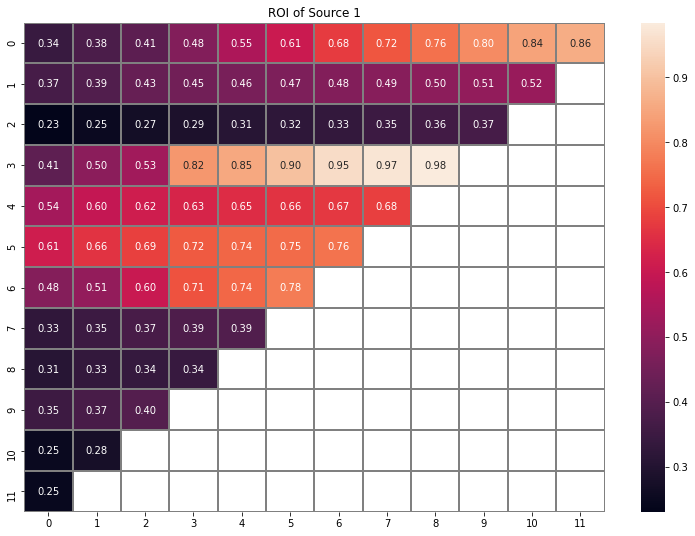

In [99]:
plt.figure(figsize=(13, 9))
plt.title('ROI of Source 1')
sns.heatmap(
    source1_roi_piv,
    annot=True,
    fmt='.2f',
    linewidths=1,
    linecolor='gray',)
plt.show()

#### Source 2

In [100]:
source2=cac_cohort[cac_cohort['source_id']=="2"]
cohort_ltv2=pd.merge(avg_rev_per_user,source2[['month_start','cac']],left_on='first_month_order',right_on='month_start')


source2_roi_piv=cohort_ltv2.loc[:,[0,1,2,3,4,5,6,7,8,9,10,11]].div(cohort_ltv2['cac'],axis=0)
source2_roi_piv


,0,1,2,3,4,5,6,7,8,9,10,11
0,0.243030,0.267996,0.290509,0.339618,0.392219,0.430054,0.478946,0.508864,0.537322,0.568484,0.597871,0.611084
1,0.277161,0.292619,0.321374,0.337928,0.346080,0.353277,0.358820,0.365360,0.372795,0.379581,0.386760,NaN
2,0.155685,0.169611,0.183138,0.194683,0.209260,0.217626,0.223842,0.235792,0.244413,0.249960,NaN,NaN
3,0.278758,0.333951,0.359677,0.556024,0.575806,0.607761,0.642411,0.654419,0.663506,NaN,NaN,NaN
4,0.362953,0.401816,0.415699,0.427097,0.438091,0.446822,0.452974,0.461350,NaN,NaN,NaN,NaN
5,0.412557,0.444510,0.460482,0.486489,0.498336,0.502648,0.511846,NaN,NaN,NaN,NaN,NaN
6,0.290339,0.306294,0.362981,0.428257,0.447432,0.468146,NaN,NaN,NaN,NaN,NaN,NaN
7,0.209748,0.224697,0.240129,0.247370,0.250550,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.202576,0.216137,0.219963,0.223576,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.232750,0.247223,0.262401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


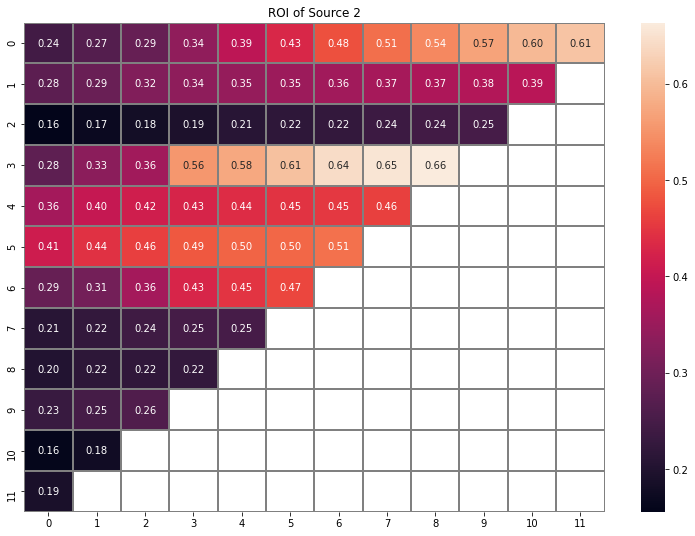

In [101]:
plt.figure(figsize=(13, 9))
plt.title('ROI of Source 2')
sns.heatmap(
    source2_roi_piv,
    annot=True,
    fmt='.2f',
    linewidths=1,
    linecolor='gray',)
plt.show()

#### Source 3

In [102]:
source3=cac_cohort[cac_cohort['source_id']=="3"]
cohort_ltv3=pd.merge(avg_rev_per_user,source3[['month_start','cac']],left_on='first_month_order',right_on='month_start')


source3_roi_piv=cohort_ltv3.loc[:,[0,1,2,3,4,5,6,7,8,9,10,11]].div(cohort_ltv3['cac'],axis=0)
source3_roi_piv


,0,1,2,3,4,5,6,7,8,9,10,11
0,0.173804,0.191658,0.207758,0.242879,0.280496,0.307554,0.342520,0.363915,0.384267,0.406553,0.427569,0.437018
1,0.194866,0.205735,0.225951,0.237590,0.243322,0.248381,0.252279,0.256877,0.262105,0.266875,0.271923,NaN
2,0.134152,0.146152,0.157808,0.167756,0.180317,0.187526,0.192882,0.203179,0.210608,0.215387,NaN,NaN
3,0.238887,0.286186,0.308232,0.476495,0.493448,0.520833,0.550526,0.560817,0.568604,NaN,NaN,NaN
4,0.302763,0.335180,0.346761,0.356269,0.365440,0.372723,0.377855,0.384842,NaN,NaN,NaN,NaN
5,0.349137,0.376178,0.389694,0.411704,0.421729,0.425379,0.433163,NaN,NaN,NaN,NaN,NaN
6,0.276402,0.291591,0.345557,0.407700,0.425955,0.445674,NaN,NaN,NaN,NaN,NaN,NaN
7,0.216115,0.231518,0.247418,0.254880,0.258156,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.214495,0.228853,0.232905,0.236730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.210094,0.223159,0.236860,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


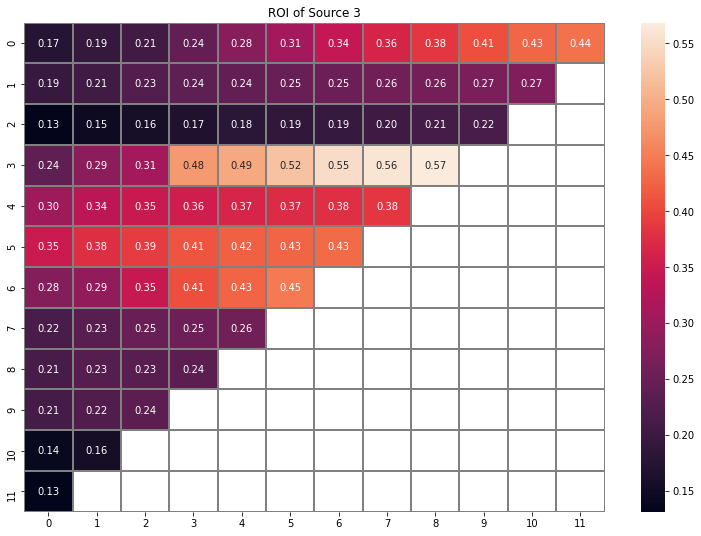

In [103]:
plt.figure(figsize=(13, 9))
plt.title('ROI of Source 3')
sns.heatmap(
    source3_roi_piv,
    annot=True,
    fmt='.2f',
    linewidths=1,
    linecolor='gray',)
plt.show()

#### Source 4

In [104]:
source4=cac_cohort[cac_cohort['source_id']=="4"]
cohort_ltv4=pd.merge(avg_rev_per_user,source4[['month_start','cac']],left_on='first_month_order',right_on='month_start')


source4_roi_piv=cohort_ltv4.loc[:,[0,1,2,3,4,5,6,7,8,9,10,11]].div(cohort_ltv4['cac'],axis=0)
source4_roi_piv


,0,1,2,3,4,5,6,7,8,9,10,11
0,0.355993,0.392563,0.425540,0.497476,0.574525,0.629947,0.701564,0.745388,0.787073,0.832721,0.875766,0.895121
1,0.457013,0.482503,0.529916,0.557212,0.570655,0.582521,0.591661,0.602445,0.614705,0.625894,0.637731,NaN
2,0.297202,0.323788,0.349612,0.371651,0.399478,0.415449,0.427315,0.450127,0.466586,0.477174,NaN,NaN
3,0.528745,0.633433,0.682231,1.054659,1.092181,1.152794,1.218516,1.241293,1.258530,NaN,NaN,NaN
4,0.771285,0.853868,0.883370,0.907593,0.930954,0.949507,0.962581,0.980380,NaN,NaN,NaN,NaN
5,0.866969,0.934116,0.967679,1.022333,1.047228,1.056290,1.075619,NaN,NaN,NaN,NaN,NaN
6,0.783497,0.826552,0.979524,1.155676,1.207421,1.263320,NaN,NaN,NaN,NaN,NaN,NaN
7,0.582287,0.623788,0.666630,0.686732,0.695560,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.536558,0.572476,0.582610,0.592180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.612440,0.650524,0.690464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


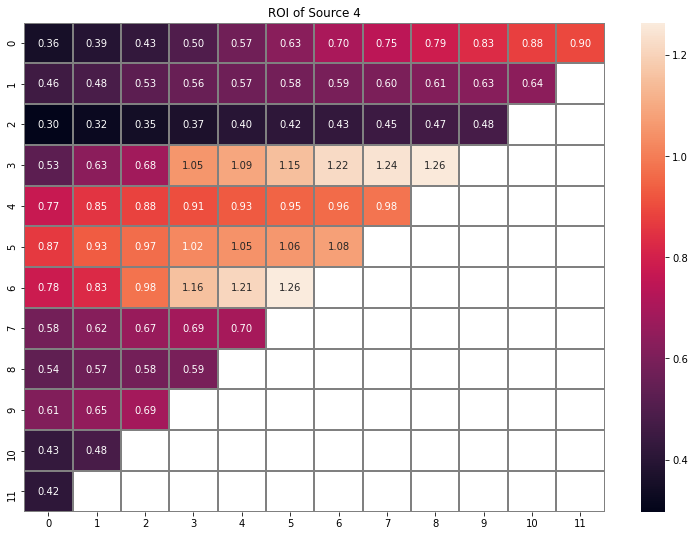

In [105]:
plt.figure(figsize=(13, 9))
plt.title('ROI of Source 4')
sns.heatmap(
    source4_roi_piv,
    annot=True,
    fmt='.2f',
    linewidths=1,
    linecolor='gray',)
plt.show()

#### Source 5

In [106]:
source5=cac_cohort[cac_cohort['source_id']=="5"]
cohort_ltv5=pd.merge(avg_rev_per_user,source5[['month_start','cac']],left_on='first_month_order',right_on='month_start')


source5_roi_piv=cohort_ltv5.loc[:,[0,1,2,3,4,5,6,7,8,9,10,11]].div(cohort_ltv5['cac'],axis=0)
source5_roi_piv


,0,1,2,3,4,5,6,7,8,9,10,11
0,0.325506,0.358945,0.389097,0.454873,0.525324,0.575999,0.641484,0.681555,0.719670,0.761408,0.800767,0.818464
1,0.465075,0.491014,0.539263,0.567041,0.580721,0.592796,0.602098,0.613072,0.625548,0.636934,0.648981,NaN
2,0.331228,0.360857,0.389638,0.414200,0.445213,0.463012,0.476237,0.501660,0.520004,0.531804,NaN,NaN
3,0.555433,0.665405,0.716666,1.107892,1.147307,1.210980,1.280020,1.303946,1.322053,NaN,NaN,NaN
4,0.733490,0.812027,0.840083,0.863119,0.885336,0.902979,0.915412,0.932339,NaN,NaN,NaN,NaN
5,0.632520,0.681509,0.705996,0.745870,0.764032,0.770644,0.784746,NaN,NaN,NaN,NaN,NaN
6,0.515591,0.543924,0.644589,0.760508,0.794560,0.831345,NaN,NaN,NaN,NaN,NaN,NaN
7,0.417582,0.447344,0.478068,0.492485,0.498815,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.408333,0.435667,0.443380,0.450663,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.367044,0.389868,0.413805,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


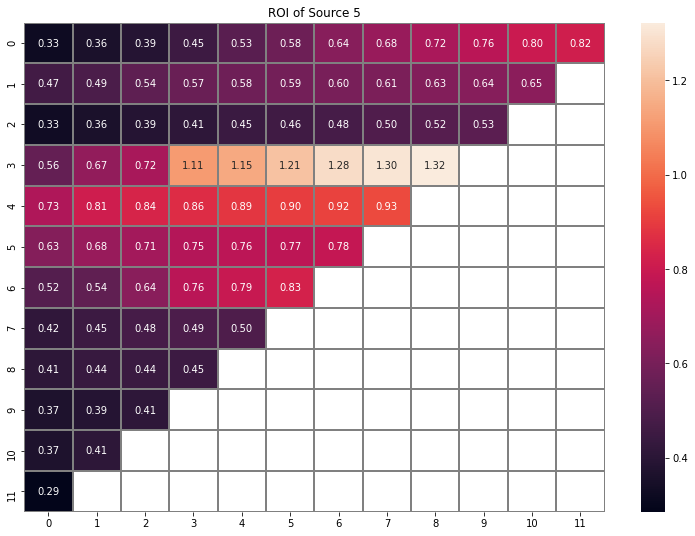

In [107]:
plt.figure(figsize=(13, 9))
plt.title('ROI of Source 5')
sns.heatmap(
    source5_roi_piv,
    annot=True,
    fmt='.2f',
    linewidths=1,
    linecolor='gray',)
plt.show()

#### Source 9

In [108]:
source9=cac_cohort[cac_cohort['source_id']=="9"]
cohort_ltv9=pd.merge(avg_rev_per_user,source9[['month_start','cac']],left_on='first_month_order',right_on='month_start')


source9_roi_piv=cohort_ltv9.loc[:,[0,1,2,3,4,5,6,7,8,9,10,11]].div(cohort_ltv9['cac'],axis=0)
source9_roi_piv


,0,1,2,3,4,5,6,7,8,9,10,11
0,0.905068,0.998044,1.081883,1.264772,1.460661,1.601563,1.783641,1.895058,2.001039,2.117091,2.226529,2.275736
1,0.776673,0.819991,0.900567,0.946956,0.969802,0.989967,1.005501,1.023828,1.044663,1.063678,1.083795,NaN
2,0.575708,0.627206,0.677230,0.719921,0.773826,0.804762,0.827747,0.871937,0.903819,0.924329,NaN,NaN
3,0.838880,1.004974,1.082394,1.673269,1.732800,1.828966,1.933237,1.969374,1.996721,NaN,NaN,NaN
4,0.942254,1.043144,1.079185,1.108777,1.137318,1.159983,1.175955,1.197699,NaN,NaN,NaN,NaN
5,1.146318,1.235100,1.279479,1.351743,1.384658,1.396640,1.422198,NaN,NaN,NaN,NaN,NaN
6,0.795210,0.838909,0.994168,1.172953,1.225472,1.282206,NaN,NaN,NaN,NaN,NaN,NaN
7,0.517190,0.554051,0.592104,0.609959,0.617800,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.458833,0.489548,0.498214,0.506398,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.804203,0.854211,0.906656,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


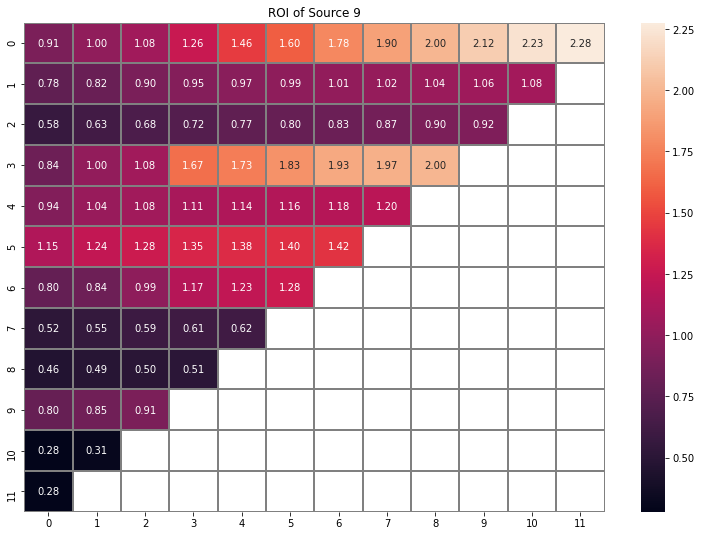

In [109]:
plt.figure(figsize=(13, 9))
plt.title('ROI of Source 9')
sns.heatmap(
    source9_roi_piv,
    annot=True,
    fmt='.2f',
    linewidths=1,
    linecolor='gray',)
plt.show()

#### Source 10

In [110]:
source10=cac_cohort[cac_cohort['source_id']=="10"]
cohort_ltv10=pd.merge(avg_rev_per_user,source10[['month_start','cac']],left_on='first_month_order',right_on='month_start')


source10_roi_piv=cohort_ltv10.loc[:,[0,1,2,3,4,5,6,7,8,9,10,11]].div(cohort_ltv10['cac'],axis=0)
source10_roi_piv


,0,1,2,3,4,5,6,7,8,9,10,11
0,0.440594,0.485856,0.526669,0.615701,0.711061,0.779654,0.868291,0.922530,0.974122,1.030617,1.083892,1.107846
1,0.406703,0.429387,0.471580,0.495871,0.507835,0.518394,0.526529,0.536125,0.547036,0.556993,0.567527,NaN
2,0.258276,0.281379,0.303821,0.322973,0.347156,0.361035,0.371346,0.391171,0.405474,0.414675,NaN,NaN
3,0.544823,0.652695,0.702976,1.086729,1.125391,1.187848,1.255569,1.279038,1.296799,NaN,NaN,NaN
4,0.833599,0.922854,0.954740,0.980919,1.006169,1.026220,1.040350,1.059587,NaN,NaN,NaN,NaN
5,0.741001,0.798392,0.827078,0.873791,0.895069,0.902814,0.919335,NaN,NaN,NaN,NaN,NaN
6,0.472803,0.498784,0.591095,0.697394,0.728620,0.762352,NaN,NaN,NaN,NaN,NaN,NaN
7,0.595930,0.638404,0.682250,0.702824,0.711858,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.666119,0.710710,0.723291,0.735172,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.833547,0.885380,0.939739,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


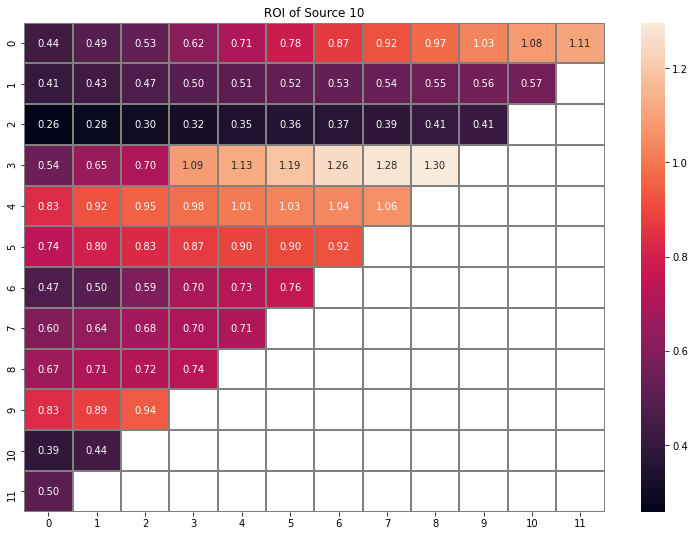

In [111]:
plt.figure(figsize=(13, 9))
plt.title('ROI of Source 10')
sns.heatmap(
    source10_roi_piv,
    annot=True,
    fmt='.2f',
    linewidths=1,
    linecolor='gray',)
plt.show()

As shown by the heatmaps, there are sources that returned their investment (such as 9 and 10) and sources that did not (3 and 2).

# Conclusion #

In this report my aim was to find analyze cohort behavior during the given time period. My goal was to determine how much revenue a user typically brought in, how long the conversion process takes on average, what sources were the most profitable, and other KPI's. 

Based on my findings I would suggest that the marketing team focus their attention on source 9 and 10. As evidenced by the it's heatmap, source 9 is capable is returning double the investment. Source 10 also has evidence of returning the investmnet completely. Source 2 and 3 performed the worst as far as ROI goes. They were the only sources that never competely returned on their investments. The most they returned was 66% and 57%, respectively.
Marketing should also keep in mind that the majority of the customer base shopped using a desktop versus a touch screen device during this time period. The metrics I focused on were cohort revenue and the CAC. For a healthy business it is imperative that the CAC is less than the LTV.